In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

# Question 1

In [ ]:
img = cv.imread('lena.jfif', 0)
eq1 = cv.equalizeHist(img)
eq2 = cv.equalizeHist(eq1)
compare = np.abs(eq2 - eq1)
cv.imshow('First equalized image', eq1)
cv.imshow('Second equalized image', eq2 )
cv.imshow('Difference', compare)
cv.waitKey(0)
cv.destroyAllWindows()

# Question 2

In [ ]:
#kernel size 1 is the most appropriate
img = cv.imread('electronic.jfif', 0)
img = cv.medianBlur(img, 3)

thresh = 110

def thresh_callback(val):
    kernel_size = val
    sobelx = cv.convertScaleAbs(cv.Sobel(img, cv.CV_64F, 1, 0, ksize=kernel_size))
    sobely = cv.convertScaleAbs(cv.Sobel(img, cv.CV_64F, 0, 1, ksize=kernel_size))
    grad_mag_L2 = cv.magnitude(sobelx, sobely)
    grad_mag_L2_xy = cv.convertScaleAbs(grad_mag_L2)
    cv.imshow('result', grad_mag_L2_xy)

name_window = 'source'
cv.namedWindow(name_window)
cv.imshow(name_window,img)

max_thresh = 10
thresh = 1
cv.createTrackbar('ksize: ', name_window, thresh, max_thresh, thresh_callback)
thresh_callback(thresh)

cv.waitKey(0)
cv.destroyAllWindows() 

(Text(0.5, 1.0, 'Without Gaussian Blurring'), ([], []), ([], []))

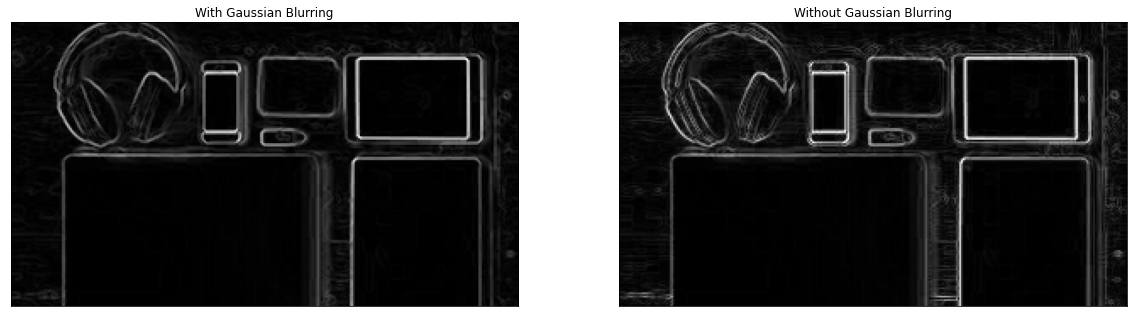

In [13]:
#edge detection with Sobel operator
#with Gaussian blurring
img = cv.imread('electronic.jfif',0)
img1 = cv.medianBlur(img, 3)
sobelx_1 = cv.Sobel(img1, cv.CV_64F, 1, 0, ksize = 1)
sobely_1 = cv.Sobel(img1, cv.CV_64F, 0, 1, ksize = 1)
grad_mag_L2_1 = cv.magnitude(sobelx_1, sobely_1)
grad_mag_L2_1 = cv.convertScaleAbs(grad_mag_L2_1)

#without Gaussian blurring
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = 1)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 1)
grad_mag_L2 = cv.magnitude(sobelx, sobely)
grad_mag_L2 = cv.convertScaleAbs(grad_mag_L2)

fig=plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(grad_mag_L2_1, cmap = 'gray')
plt.title('With Gaussian Blurring'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(grad_mag_L2, cmap = 'gray')
plt.title('Without Gaussian Blurring'), plt.xticks([]), plt.yticks([])

In [15]:
#Laplacian of Gaussian
img = cv.imread('electronic.jfif', 0)
gaussian = cv.GaussianBlur(img, (5,5), 0)

laplacian = cv.Laplacian(gaussian, cv.CV_64F, ksize = 3)
laplacian = np.uint8(np.absolute(laplacian))

cv.imshow('Laplacian of Gaussian', laplacian)

cv.waitKey(0)
cv.destroyAllWindows()

# Question 3

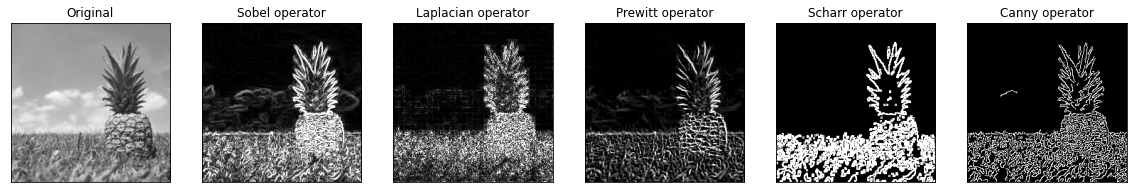

In [12]:
img = cv.imread('pineapple.jfif', 0)

#Sobel operator
ret, th = cv.threshold(img,110,255,cv.THRESH_BINARY_INV)
sobelx = cv.convertScaleAbs(cv.Sobel(th, cv.CV_64F, 1, 0, ksize=3))
sobely = cv.convertScaleAbs(cv.Sobel(th, cv.CV_64F, 0, 1, ksize=3))
sobelxy = cv.bitwise_or(sobelx,sobely)

sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize = 3)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize = 3)
grad_mag_L2 = cv.magnitude(sobelx, sobely)
grad_mag_L2 = cv.convertScaleAbs(grad_mag_L2)

#Laplacian 
laplacian = cv.Laplacian(img, cv.CV_64F, ksize = 3)
laplacian_uint8 = cv.convertScaleAbs(laplacian)

#Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewittx = cv.filter2D(img, -1, kernelx)
prewitty = cv.filter2D(img, -1, kernely)
prewittxy = cv.bitwise_or(prewittx,prewitty)

#Scharr
ret, th = cv.threshold(img,110,255,cv.THRESH_BINARY_INV)
scharrx = cv.convertScaleAbs(cv.Scharr(th, cv.CV_64F, 1, 0))
scharry = cv.convertScaleAbs(cv.Scharr(th, cv.CV_64F, 0, 1))
scharrxy = cv.bitwise_or(scharrx,scharry)

#Canny
canny = cv.Canny(img, 100, 200)

fig=plt.figure(figsize=(20,20))
plt.subplot(161), plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(162), plt.imshow(grad_mag_L2, cmap = 'gray')
plt.title('Sobel operator'), plt.xticks([]), plt.yticks([])

plt.subplot(163), plt.imshow(laplacian_uint8, cmap = 'gray')
plt.title('Laplacian operator'), plt.xticks([]), plt.yticks([])

plt.subplot(164), plt.imshow(prewittxy, cmap = 'gray')
plt.title('Prewitt operator'), plt.xticks([]), plt.yticks([])

plt.subplot(165), plt.imshow(scharrxy, cmap = 'gray')
plt.title('Scharr operator'), plt.xticks([]), plt.yticks([])

plt.subplot(166), plt.imshow(canny, cmap='gray')
plt.title('Canny operator'), plt.xticks([]), plt.yticks([])

plt.show()

# Question 4

In [ ]:
img = cv.imread('electronic.jfif')


cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()